In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Először is kell egy loop a fájlok beolvasására; ezeket mind el kell majd tárolni, szóval lehet először egy beolvasóciklus egy adott könyvtár összes fájljára, majd ezekre egyesével lefuttatom majd a normálást, a rebint, majd a főkompinens analízist. Tehát beolvasás:

In [2]:
import os
from numpy import loadtxt
from numpy import append
import codecs

In [3]:
data=loadtxt('emisslines.txt')
data.shape

(13787, 59)

In [4]:
print(data)

[[  8.66347088e+16   1.92386000e+01   1.80219000e+01 ...,   1.23107000e+00
    1.07600000e+00   1.98866026e+00]
 [  8.66347089e+16   1.93329000e+01   1.85948000e+01 ...,   1.57473000e+00
    2.04507000e+00   2.30221849e+00]
 [  8.66347089e+16   2.06914000e+01   1.90301000e+01 ...,  -1.50105000e-01
    9.86770000e-01   2.33645120e-01]
 ..., 
 [  8.31429941e+17   1.93667000e+01   1.74911000e+01 ...,   6.36030000e-01
   -7.42585000e-02  -9.86889764e-01]
 [  8.31429941e+17   1.85669000e+01   1.75165000e+01 ...,   7.83868000e-01
    8.87521000e-01  -4.27054880e-03]
 [  8.31429941e+17   1.91550000e+01   1.80001000e+01 ...,   1.07516000e+00
    2.46128000e-01   7.60975260e-01]]


Oszlopokat tartom meg, ezeket kiszedegetem az  adatsorból

In [5]:
lineEWp=numpy.empty((10,13788))
lineEWp[:,0]=[6565,4863,6718,6733,4342,3727,5008,4960,6585,6550]
lineEWp[0,1:]=data[:,19]
lineEWp[1,1:]=data[:,23]
lineEWp[2,1:]=data[:,27]
lineEWp[3,1:]=data[:,31]
lineEWp[4,1:]=data[:,35]
lineEWp[5,1:]=data[:,39]
lineEWp[6,1:]=data[:,43]
lineEWp[7,1:]=data[:,47]
lineEWp[8,1:]=data[:,51]
lineEWp[9,1:]=data[:,55]

# sorbarendezem őket hullámhossz szerint

lineEW=numpy.empty((10,13788))

lineEW[0,:]=lineEWp[5,:]
lineEW[1,:]=lineEWp[4,:]
lineEW[2,:]=lineEWp[1,:]
lineEW[3,:]=lineEWp[7,:]
lineEW[4,:]=lineEWp[6,:]
lineEW[5,:]=lineEWp[9,:]
lineEW[6,:]=lineEWp[0,:]
lineEW[7,:]=lineEWp[8,:]
lineEW[8,:]=lineEWp[2,:]
lineEW[9,:]=lineEWp[3,:]
#print(lineEWp) # ez stimmel

In [6]:
print(lineEW[:,1]) # ez is jónak néz ki

[ 2.0115    1.14995   2.067    -0.744458  0.184125  1.05734   3.33148
  2.17149   1.44231   1.15532 ]


In [7]:
# Save
# numpy.save('./PCAfeldolgozas/lines.npy', lineEW) 

# Load
# lineEW = numpy.load('./PCAfeldolgozas/lines.npy').item()
# print(read_dictionary)

In [8]:
#lineEW=lineEWp

<Container object of 3 artists>

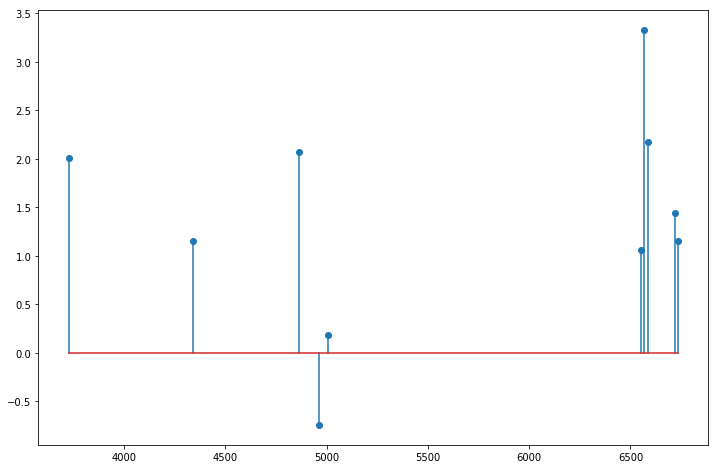

In [9]:
figsize(12,8)
plt.stem(lineEW[:,0],lineEW[:,1])

A vonal EW-k be vannak töltve a **lineEW**-be, az első oszlop a laboratóriumi hullámhosszak, a többi a line EW

In [24]:
atlagemiss=numpy.empty((10,2))
atlagemiss[:,0]=lineEW[:,0]
for k in range (0,10):
    for j in range (0,13787):
        atlagemiss[k,1]+=lineEW[k,j+1]
    atlagemiss[k,1]=atlagemiss[k,1]/13787
print(atlagemiss)
#numpy.save('./PCAfeldolgozas/emissatlagnosorb.npy',atlagemiss)

[[  6.56500000e+03  -3.53204270e-02]
 [  4.86300000e+03  -2.64172435e-02]
 [  6.71800000e+03  -2.20115147e-02]
 [  6.73300000e+03  -1.99779625e-02]
 [  4.34200000e+03  -1.99111704e-02]
 [  3.72700000e+03  -2.58998561e-02]
 [  5.00800000e+03  -1.29712879e-02]
 [  4.96000000e+03  -6.29341211e-03]
 [  6.58500000e+03  -2.65902329e-02]
 [  6.55000000e+03  -1.82441867e-02]]


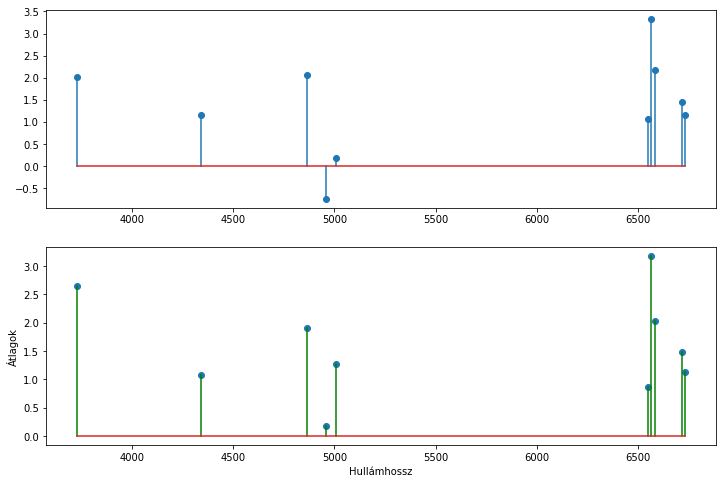

In [11]:
plt.figure(1)
plt.subplot(211)
plt.stem(lineEW[:,0],lineEW[:,1])
plt.subplot(212)
plt.stem(atlagemiss[:,0],atlagemiss[:,1],'g')
plt.ylabel('Átlagok')
plt.xlabel('Hullámhossz')

In [12]:
for j in range (0,13787):
    lineEW[:,j+1]=lineEW[:,j+1]-atlagemiss[:,1]
#numpy.save('./PCAfeldolgozas/emiss_levontatlag.npy',lineEW)

<Container object of 3 artists>

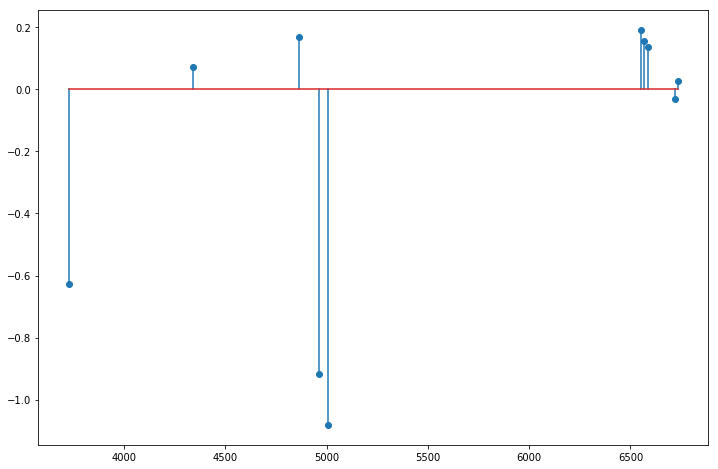

In [13]:
plt.stem(lineEW[:,0],lineEW[:,1])

Először létrehozom a korrelációmátrixot, ebben oszloponként vannak bent az egyes log(**EW**)-k

In [7]:
korrelaciomatrix=numpy.empty((10,13787))
korrelaciomatrix[:,:]=lineEW[:,1:]
print(korrelaciomatrix)

[[ 2.0115    3.23478   2.9072   ...,  2.2671    2.15383   3.24671 ]
 [ 1.14995   1.66416   0.34619  ...,  0.535753  0.880342  1.58702 ]
 [ 2.067     2.55159   1.15192  ...,  0.571888  1.57319   1.84907 ]
 ..., 
 [ 2.17149   3.03584   2.11629  ...,  2.16274   1.46358   1.06472 ]
 [ 1.44231   2.33382   1.17874  ...,  1.16978   1.17064   1.47272 ]
 [ 1.15532   2.05502   1.08947  ...,  0.407996  0.48248   0.988038]]


In [8]:
xxT=numpy.dot(korrelaciomatrix, korrelaciomatrix.T)
xxT.shape

(10, 10)

Majd erre futtatom le az SVD-t

In [9]:
U, s, V = numpy.linalg.svd(xxT)
U.shape, V.shape, s.shape

((10, 10), (10, 10), (10,))

In [10]:
print(V)
numpy.save('./PCAfeldolgozas/EmissVnoatl.npy',V)
V4=V[0:4,:]
numpy.save('./PCAfeldolgozas/EmissV4noatl.npy',V4)

[[-0.45037438 -0.20541958 -0.33964113 -0.07610391 -0.2525721  -0.16850415
  -0.54528539 -0.3497343  -0.27234763 -0.21865046]
 [ 0.07824255 -0.08939555  0.04183146 -0.73156991 -0.55397801 -0.03194613
   0.26347654  0.21628943 -0.06692734 -0.14265227]
 [ 0.59205818 -0.21219375 -0.1126488  -0.05776307  0.2268854  -0.62955559
   0.07654112 -0.26531368 -0.11385753 -0.22668027]
 [ 0.11419759 -0.53515509 -0.32832443 -0.03987526  0.34134983  0.36450691
  -0.08434321  0.49777188 -0.21581341 -0.20082314]
 [ 0.3496525  -0.07586332 -0.23427959 -0.30013279 -0.02011282  0.12777797
  -0.47402383 -0.09534958  0.43746869  0.5339668 ]
 [-0.20869359  0.37434471  0.08718783 -0.58996058  0.64610862  0.04060586
  -0.08659692 -0.11318437 -0.10926333 -0.09645952]
 [ 0.43713964  0.62538283 -0.19812266  0.1207318  -0.20191217  0.21265845
  -0.30637343  0.14689425 -0.24177991 -0.32262086]
 [ 0.19008445 -0.24168901  0.37477676 -0.02749006 -0.03054256  0.51210348
  -0.04666223 -0.50496252  0.21755426 -0.44335518]


Végül kiszámoljuk a főkomponenseket: lényegében csak a $V$-vel szorozzuk az összes oszlopvektort. Tehát ha vissza akarom majd kapni az **EW**-ket az együtthatókból, akkor csak a ezen mátrix inverzével kell szorozni az együtthatók vektorát.

In [11]:
PCsemiss=numpy.dot(V, korrelaciomatrix)
# numpy.save('./PCAfeldolgozas/PCsemiss.npy',PCsemiss)
PCsemiss4en=numpy.dot(V4, korrelaciomatrix)
#numpy.save('./PCAfeldolgozas/PCsemiss4ennosorb.npy',PCsemiss4en)

In [12]:
print(PCsemiss[:,0])
#numpy.save('./PCAfeldolgozas/PCAemissGX1.npy',PCsemiss[:,0])

[ -5.23367625e+00   1.63599220e+00  -6.14046022e-01  -3.29761371e-01
  -5.17147593e-02  -1.13002443e-02  -1.36408174e-01  -1.50145768e-02
   3.09309084e-02   4.46816218e-03]


In [13]:
figsize(12,8)
mintapontok=[6565,4863,6718,6733,4342,3727,5008,4960,6585,6550]
temp=PCsemiss[:,0]
logEWred=numpy.dot(V.T,temp)
logEWk=logEWred+atlagemiss[:,1]
plt.stem(mintapontok[:],logEWk[:],'r')
plt.stem(lineEW[:,0],lineEW[:,1]+atlagemiss[:,1])

NameError: name 'atlagemiss' is not defined

(-0.9, 0.9)

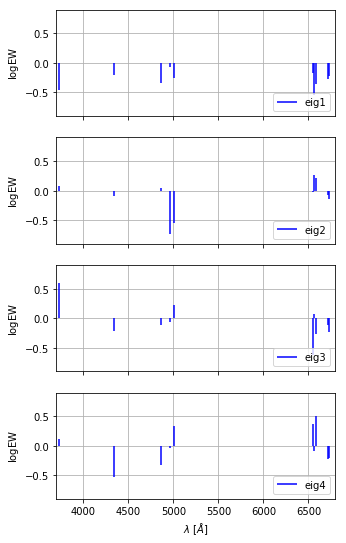

In [14]:
figsize(18,8)
#V=numpy.load('./PCAfeldolgozas/EmissV.npy')
eig5=V[0:5,:]
mintapontok=[3727,4342,4863,4960,5008,6550,6565,6585,6718,6733]
figsize(5,9)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, sharey=True)
ax1.vlines(mintapontok,0,eig5[0,:],label='eig1',color='blue')
ax1.grid(True)
ax1.legend(loc=4)
ax1.set_ylabel('$\log{\mathrm{EW}}$')
ax2.vlines(mintapontok,0,eig5[1,:],label='eig2',color='blue')
ax2.grid(True)
ax2.legend(loc=4)
ax2.set_ylabel('$\log{\mathrm{EW}}$')
ax3.vlines(mintapontok,0,eig5[2,:],label='eig3',color='blue')
ax3.grid(True)
ax3.legend(loc=4)
ax3.set_ylabel('$\log{\mathrm{EW}}$')
ax4.vlines(mintapontok,0,eig5[3,:],label='eig4',color='blue')
ax4.grid(True)
ax4.set_ylabel('$\log{\mathrm{EW}}$')
ax4.legend(loc=4)
xlabel('$\lambda$ [$\AA$]')
xlim(3700,6800)
ylim(-0.9,0.9)
# savefig('emisspca.pdf', bbox_inches='tight')

In [18]:
# from sklearn.cluster import KMeans

Beck féle sajátvektorok behozatala

In [23]:
eig4=numpy.empty((4,10))
eig4[0]=[-0.342929,-0.204615,-0.336994,-0.0787687,-0.252934,-0.167194,-0.539688,-0.345591,-0.271008,-0.218075]
eig4[1]=[0.100571,0.0604791,-0.0792591,0.715315,0.53597,-0.0131608,-0.310997,-0.260573,0.039487,0.114431]
eig4[2]=[0.520538,-0.16036,-0.0854877,-0.192218,0.0709786,-0.633041,0.0753818,-0.292177,-0.073244,-0.188573]
eig4[3]=[0.574171,0.251172,0.1207,-0.00264742,-0.224108,0.00223063,-0.0562945,-0.17211,0.126566,0.160372]

In [48]:
print(eig4)

[[-0.342929   -0.204615   -0.336994   -0.0787687  -0.252934   -0.167194
  -0.539688   -0.345591   -0.271008   -0.218075  ]
 [ 0.100571    0.0604791  -0.0792591   0.715315    0.53597    -0.0131608
  -0.310997   -0.260573    0.039487    0.114431  ]
 [ 0.520538   -0.16036    -0.0854877  -0.192218    0.0709786  -0.633041
   0.0753818  -0.292177   -0.073244   -0.188573  ]
 [ 0.574171    0.251172    0.1207     -0.00264742 -0.224108    0.00223063
  -0.0562945  -0.17211     0.126566    0.160372  ]]


In [49]:
PCEm4=numpy.dot(eig4, korrelaciomatrix)

In [50]:
print(PCEm4)

[[ 0.26098737 -2.27057574  0.56246088 ...,  0.98861481  1.33506512
   0.05242739]
 [-1.3947852   0.63487149  1.35401799 ...,  1.19813882 -0.79536532
   1.05906224]
 [-0.42066657 -1.14496818  0.08228931 ..., -0.35408247  0.44369296
   0.98906058]
 [-0.08967943  0.45253986 -0.31496764 ..., -0.79676863 -0.14148378
   0.52532918]]


In [52]:
numpy.save('./PCAfeldolgozas/PCsemiss4.npy',PCEm4)
numpy.save('./PCAfeldolgozas/emieig4.npy',eig4)